# 6. Z-test for comparing two counts (Poisson distribution)

## Objective

- To investigate the significance of the difference between two counts

- Layman:
    - Suppose I have a count of some process $n_1$ over some time period $t_1$. Then I know the rate of this process is $R_1 = \frac{n_1}{t_1}$
    - Next, suppose I have a count of some process $n_2$ over some time period $t_2$. Then I know the rate of this process is $R_2 = \frac{n_2}{t_2}$
    - I want to know if the rates $R_1$ and $R_2$ are the same

## Assumptions

- $n_1$ and $n_2$ are large enough for the normal approximation of Poisson distribution to apply

## Method

- Test statistic is 
$$\begin{aligned}
    Z &= \frac{(R_1 - R_2)}{\sqrt{(\frac{R_1}{t_1} + \frac{R_2}{t_2})}}
\end{aligned}$$

- Test statistic is Gaussian

## Example

- Problem
    - Two traffic roundabouts are compared for intensity of traffic at non-peak times 
    - Roundabout one has 476 arrivals over 11 minutes 
    - Roundabout two has 584 arrivals over 15 minutes 
    - The arrival rates, per minute, are therefore 476/11 (43.27) and 584/15 (38.93).

- Question
    - Are these rates the same?
    - Is $R_1 > R_2$?
    - Is $R_1 < R_2$?

In [2]:
n1 = 952
n2 = 1168
t1 = 22
t2 = 30
r1 = n1/t1
r2 = n2/t2

def compute_test_statistic(r1, r2):
    return (r1-r2) / (r1/t1 + r2/t2)**0.5

compute_test_statistic(r1, r2)

2.4016300728032665

## Proof by simulation that test statistic is normal

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

BASE_RATE1 = 10
BASE_RATE2 = 10

COUNT_OBS_1 = np.random.poisson(BASE_RATE1, size=10_000)
TIME_OBS_1 = 100
COUNT_OBS_2 = np.random.poisson(BASE_RATE2, size=10_000)
TIME_OBS_2 = 100

R1 = COUNT_OBS_1/TIME_OBS_1
R2 = COUNT_OBS_2/TIME_OBS_2

-0.0012109293595032598
0.99231634706811


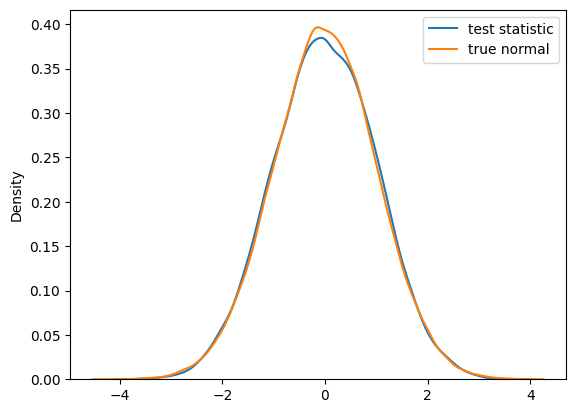

In [24]:
test_statistic_distribution = (
    (R1 - R2) / ((R1/TIME_OBS_1 + R2/TIME_OBS_2)**0.5)
)
true_normal_distribution = np.random.normal(0, 1, 10_0000)
print(test_statistic_distribution.mean())
print(test_statistic_distribution.var())
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_normal_distribution, label='true normal')
plt.legend()
# test_statistic_distribution